### Importação dos dados



Os dados de vendas das quatro lojas estao em arquivos CSV no GitHub, e vi uma oportunidade de organiza-los para facilitar a analise inicial de cada uma. Entao, carregados esses dados, conferi a planilha de cada loja, como o numero de linhas e colunas, listei as colunas disponiveis e apresentei as primeiras cinco linhas com a biblioteca tabulate.

In [ ]:
# Instala a biblioteca tabulate
!pip install tabulate

# Importa as bibliotecas necessárias
import pandas as pd
from tabulate import tabulate

# URLs dos arquivos CSV contendo os dados das lojas (armazenados no GitHub)
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Carrega cada arquivo CSV em um DataFrame do pandas
loja1 = pd.read_csv(url1)  # DataFrame com os dados da Loja 1
loja2 = pd.read_csv(url2)  # DataFrame com os dados da Loja 2
loja3 = pd.read_csv(url3)  # DataFrame com os dados da Loja 3
loja4 = pd.read_csv(url4)  # DataFrame com os dados da Loja 4

# Verifica o número de linhas e colunas de cada DataFrame
print("=== Verificação Inicial ===")
print(f"Loja 1: {loja1.shape[0]} linhas, {loja1.shape[1]} colunas")
print(f"Loja 2: {loja2.shape[0]} linhas, {loja2.shape[1]} colunas")
print(f"Loja 3: {loja3.shape[0]} linhas, {loja3.shape[1]} colunas")
print(f"Loja 4: {loja4.shape[0]} linhas, {loja4.shape[1]} colunas")

# Imprime os nomes das colunas de cada DataFrame
print("\n=== Nomes das Colunas por Loja ===")
print("\nLoja 1:")
print(list(loja1.columns))
print("\nLoja 2:")
print(list(loja2.columns))
print("\nLoja 3:")
print(list(loja3.columns))
print("\nLoja 4:")
print(list(loja4.columns))

# Imprime as 5 primeiras linhas de cada DataFrame usando tabulate para melhor formatação
print("\n=== 5 Primeiras Linhas por Loja ===")
print("\nLoja 1:")
print(tabulate(loja1.head(), headers='keys', tablefmt='psql', showindex=True))
print("\nLoja 2:")
print(tabulate(loja2.head(), headers='keys', tablefmt='psql', showindex=True))
print("\nLoja 3:")
print(tabulate(loja3.head(), headers='keys', tablefmt='psql', showindex=True))
print("\nLoja 4:")
print(tabulate(loja4.head(), headers='keys', tablefmt='psql', showindex=True))

=== Verificação Inicial ===
Loja 1: 2359 linhas, 12 colunas
Loja 2: 2359 linhas, 12 colunas
Loja 3: 2359 linhas, 12 colunas
Loja 4: 2358 linhas, 12 colunas

=== Nomes das Colunas por Loja ===

Loja 1:
['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra', 'Vendedor', 'Local da compra', 'Avaliação da compra', 'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon']

Loja 2:
['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra', 'Vendedor', 'Local da compra', 'Avaliação da compra', 'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon']

Loja 3:
['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra', 'Vendedor', 'Local da compra', 'Avaliação da compra', 'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon']

Loja 4:
['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra', 'Vendedor', 'Local da compra', 'Avaliação da compra', 'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon']

=== 5 Primeiras Linhas 

#1. Análise do faturamento


Para compreender melhor o desempenho financeiro das quatro lojas, iniciei uma analise do faturamento. O primeiro passo foi reunir os dados de vendas de cada loja, que incluiam informacoes sobre os precos dos produtos e os custos de frete.

Com esses dados em maos, calculei o faturamento total de cada loja. Para isso, somei o valor de venda dos produtos ao custo do frete, resultando em um total que reflete a receita gerada por cada loja.

In [ ]:
# Importa as bibliotecas
import pandas as pd
from tabulate import tabulate

# Adiciona a coluna Loja a cada DataFrame
loja1['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

# Concatena os DataFrames
df = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

# Calcula o faturamento (Preço + Frete)
df['Faturamento'] = df['Preço'] + df['Frete']

# Função para formatar valores com R$
def format_currency(x):
    return f"R${x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")

# Agrupa por Loja e calcula o faturamento total
faturamento_total = df.groupby('Loja')['Faturamento'].sum().reset_index()
faturamento_total['Faturamento (R$)'] = faturamento_total['Faturamento'].apply(format_currency)
faturamento_total = faturamento_total[['Loja', 'Faturamento (R$)']]

# Exibe a tabela
print("Faturamento Total por Loja:")
print(tabulate(faturamento_total, headers='keys', tablefmt='psql', showindex=False))

Faturamento Total por Loja:
+--------+--------------------+
| Loja   | Faturamento (R$)   |
|--------+--------------------|
| Loja 1 | R$1.616.347,09     |
| Loja 2 | R$1.567.773,22     |
| Loja 3 | R$1.542.047,69     |
| Loja 4 | R$1.458.253,46     |
+--------+--------------------+


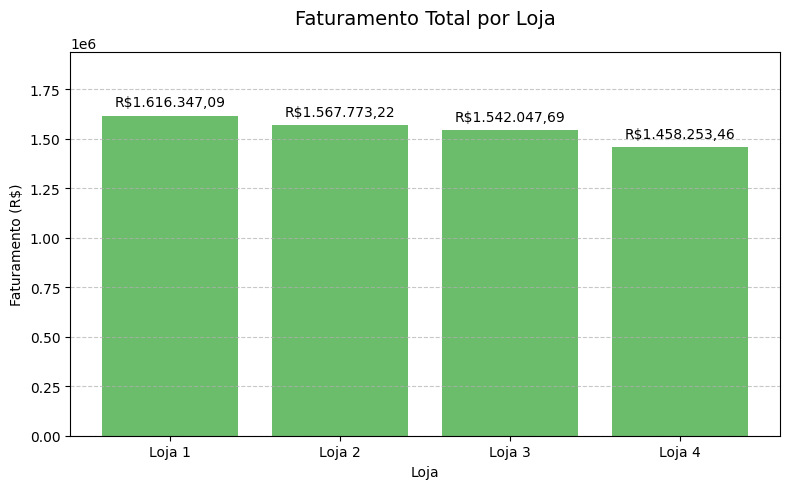

Gráfico salvo como 'grafico_faturamento_total_loja.png'


In [ ]:
# Importa as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# Agrupa por Loja e calcula o faturamento total
faturamento_total = df.groupby('Loja')['Faturamento'].sum().reset_index()

# Função para formatar valores com R$
def format_currency(x):
    return f"R${x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")

# Gráfico de barras: Faturamento Total por Loja
plt.figure(figsize=(8, 5))
plt.bar(faturamento_total['Loja'], faturamento_total['Faturamento'], color='#2ca02c', alpha=0.7) # Cor verde

# Adiciona rótulos com o valor do faturamento
for i, v in enumerate(faturamento_total['Faturamento']):
    plt.text(i, v + max(faturamento_total['Faturamento']) * 0.02, format_currency(v),
             ha='center', va='bottom', fontsize=10)

plt.xlabel('Loja')
plt.ylabel('Faturamento (R$)')
plt.title('Faturamento Total por Loja', fontsize=14, pad=20)
plt.ylim(0, max(faturamento_total['Faturamento']) * 1.2)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('grafico_faturamento_total_loja.png')
plt.show()

# Confirma salvamento do gráfico
print("Gráfico salvo como 'grafico_faturamento_total_loja.png'")

Apos a criacao do grafico que ilustra o faturamento total de cada loja, consegui extrair um primeiro insight importante para minha analise. observei que a loja 1 se destaca como a que apresenta o maior faturamento entre as quatro lojas analisadas e a loja 4 menor faturamento.

Para aprofundar a compreensao do desempenho de faturamento das quatro lojas, explorei os dados de vendas segmentados por estado. Realizei a organizacao dessas informacoes em uma tabela, onde agrupei os dados por loja e estado, permitindo uma visualizacao mais clara das vendas em cada estado.

Na tabela, ordenei o faturamento total de cada loja de maior para menor, o que facilitou a validacao do faturamento total geral. Essa abordagem nao apenas confirma os dados previamente analisados, mas tambem destaca quais estados estao contribuindo mais significativamente para o faturamento das lojas.

Os resultados indicam que os estados de sao paulo, rio de janeiro, minas gerais, rio grande do sul, parana e santa catarina sao as principais fontes de faturamento para as quatro lojas.

In [ ]:
# Importa as bibliotecas
import pandas as pd
from tabulate import tabulate

# Função para formatar valores com R$
def format_currency(x):
    return f"R${x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")

# Agrupa por Loja e Local da compra (cidade/estado), calcula o faturamento total e ordena do maior para o menor
faturamento_cidade_loja = df.groupby(['Loja', 'Local da compra'])['Faturamento'].sum().reset_index()
faturamento_cidade_loja = faturamento_cidade_loja.sort_values(by=['Loja', 'Faturamento'], ascending=[True, False])
faturamento_cidade_loja['Faturamento (R$)'] = faturamento_cidade_loja['Faturamento'].apply(format_currency)
faturamento_cidade_loja = faturamento_cidade_loja[['Loja', 'Local da compra', 'Faturamento (R$)']]

# Exibe a tabela
print("Faturamento Total por Cidade por Loja (Ordenado do Maior para o Menor):")
for loja in faturamento_cidade_loja['Loja'].unique():
    loja_data = faturamento_cidade_loja[faturamento_cidade_loja['Loja'] == loja]
    total_loja = loja_data['Faturamento (R$)'].str.replace('R$', '').str.replace('.', '').str.replace(',', '.').astype(float).sum()
    total_loja_formatted = format_currency(total_loja)
    print(f"\n{loja}:")
    print(tabulate(loja_data[['Local da compra', 'Faturamento (R$)']], headers='keys', tablefmt='psql', showindex=False))
    print(f"\nTotal {loja}: {total_loja_formatted}")

Faturamento Total por Cidade por Loja (Ordenado do Maior para o Menor):

Loja 1:
+-------------------+--------------------+
| Local da compra   | Faturamento (R$)   |
|-------------------+--------------------|
| SP                | R$617.919,29       |
| RJ                | R$242.310,23       |
| MG                | R$174.677,74       |
| RS                | R$117.257,13       |
| PR                | R$99.611,08        |
| SC                | R$59.319,05        |
| GO                | R$53.234,26        |
| BA                | R$46.248,15        |
| DF                | R$31.328,17        |
| PE                | R$24.703,14        |
| ES                | R$19.607,31        |
| CE                | R$18.561,86        |
| MT                | R$16.264,65        |
| PA                | R$13.555,46        |
| PB                | R$13.411,82        |
| MS                | R$12.427,09        |
| AL                | R$11.285,94        |
| TO                | R$10.058,57        |
| RN            

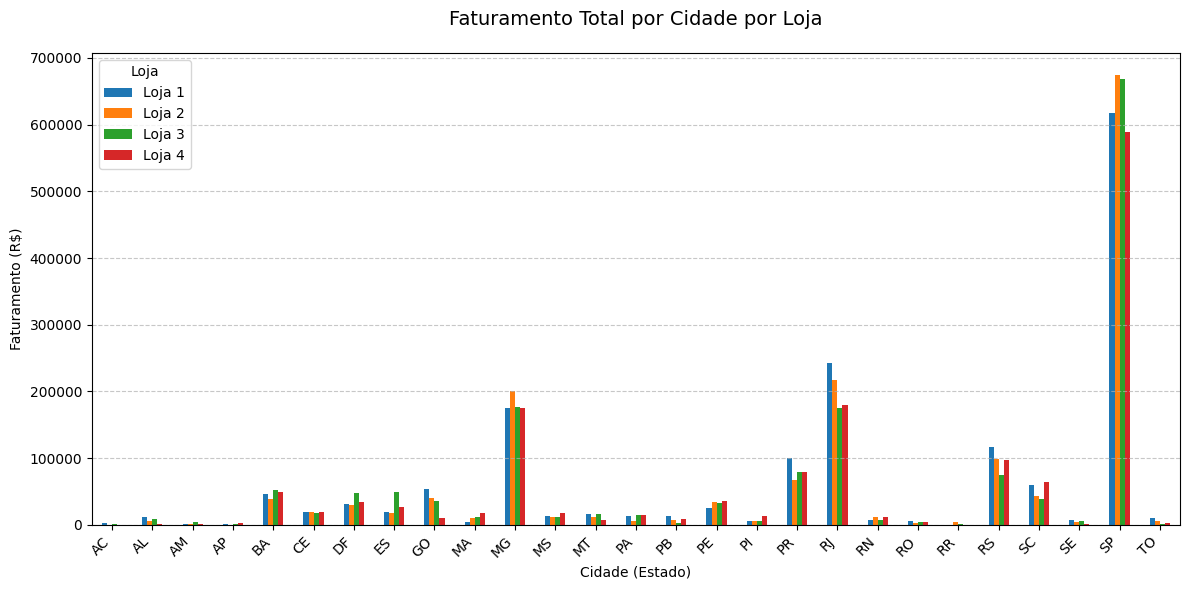

Gráfico de barras salvo como 'grafico_barras_faturamento_cidade.png'


In [ ]:
# Importa as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# Agrupa por Loja e Local da compra (cidade/estado), calcula o faturamento total
faturamento_cidade_loja = df.groupby(['Loja', 'Local da compra'])['Faturamento'].sum().reset_index()
pivot_cidade = faturamento_cidade_loja.pivot(index='Local da compra', columns='Loja', values='Faturamento')

# Define as cores personalizadas para as lojas
colors = {
    'Loja 1': '#1f77b4',  # Azul
    'Loja 2': '#ff7f0e',  # Laranja
    'Loja 3': '#2ca02c',  # Verde
    'Loja 4': '#d62728'   # Vermelho
}

# Gráfico: Barras (Faturamento por cidade por loja)
plt.figure(figsize=(12, 6))
pivot_cidade.plot(
    kind='bar',
    ax=plt.gca(),
    color=[colors.get(col, 'gray') for col in pivot_cidade.columns]  # Aplica as cores definidas
)
plt.xlabel('Cidade (Estado)')
plt.ylabel('Faturamento (R$)')
plt.title('Faturamento Total por Cidade por Loja', fontsize=14, pad=20)
plt.legend(title='Loja')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('grafico_barras_faturamento_cidade.png')
plt.show()

# Confirma salvamento do gráfico
print("Gráfico de barras salvo como 'grafico_barras_faturamento_cidade.png'")

Para facilitar a compreensao dos dados de faturamento por estado, criei um grafico de barras. Neste grafico, utilizei cores distintas para representar cada uma das lojas: azul para a loja 1, laranja para a loja 2, verde para a loja 3 e vermelho para a loja 4. Essa escolha de cores nao apenas torna o grafico visualmente atraente, mas tambem ajuda a diferenciar rapidamente o desempenho de cada loja.

O grafico permite visualizar claramente quais estados apresentam os maiores e os menores faturamentos. As barras mais altas indicam as cidades onde as lojas estao se saindo melhor em termos de vendas, enquanto as barras mais baixas mostram aquelas com desempenho inferior. essa representacao grafica e uma ferramenta poderosa, pois transforma dados numericos em informacoes visuais que sao mais faceis de interpretar e analisar.


Para entender melhor as preferencias dos clientes em relacao as formas de pagamento, extrai os dados sobre os tipos de pagamento utilizados nas quatro lojas.

Apos a analise, ficou evidente que o cartao de credito e a forma de pagamento mais utilizada pelos clientes.

In [ ]:
# Importa as bibliotecas
import pandas as pd
from tabulate import tabulate

# Função para formatar valores com R$
def format_currency(x):
    return f"R${x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")

# 1. Faturamento geral por tipo de pagamento
faturamento_tipo = df.groupby('Tipo de pagamento')['Faturamento'].sum().reset_index()
faturamento_tipo = faturamento_tipo.sort_values(by='Faturamento', ascending=False)
faturamento_tipo['Faturamento (R$)'] = faturamento_tipo['Faturamento'].apply(format_currency)
faturamento_tipo = faturamento_tipo[['Tipo de pagamento', 'Faturamento (R$)']]

# 2. Faturamento por tipo de pagamento por loja
faturamento_tipo_loja = df.groupby(['Loja', 'Tipo de pagamento'])['Faturamento'].sum().reset_index()
faturamento_tipo_loja = faturamento_tipo_loja.sort_values(by=['Loja', 'Faturamento'], ascending=[True, False])
faturamento_tipo_loja['Faturamento (R$)'] = faturamento_tipo_loja['Faturamento'].apply(format_currency)
faturamento_tipo_loja = faturamento_tipo_loja[['Loja', 'Tipo de pagamento', 'Faturamento (R$)']]

# Exibe as tabelas
print("Faturamento Total por Tipo de Pagamento (Ordenado do Maior para o Menor):")
print(tabulate(faturamento_tipo, headers='keys', tablefmt='psql', showindex=False))

print("\nFaturamento Total por Tipo de Pagamento por Loja (Ordenado do Maior para o Menor):")
for loja in faturamento_tipo_loja['Loja'].unique():
    loja_data = faturamento_tipo_loja[faturamento_tipo_loja['Loja'] == loja]
    total_loja = loja_data['Faturamento (R$)'].str.replace('R$', '').str.replace('.', '').str.replace(',', '.').astype(float).sum()
    total_loja_formatted = format_currency(total_loja)
    print(f"\n{loja}:")
    print(tabulate(loja_data[['Tipo de pagamento', 'Faturamento (R$)']], headers='keys', tablefmt='psql', showindex=False))
    print(f"\nTotal {loja}: {total_loja_formatted}")

Faturamento Total por Tipo de Pagamento (Ordenado do Maior para o Menor):
+---------------------+--------------------+
| Tipo de pagamento   | Faturamento (R$)   |
|---------------------+--------------------|
| cartao_credito      | R$4.537.242,96     |
| boleto              | R$1.236.563,66     |
| cupom               | R$331.304,44       |
| cartao_debito       | R$79.310,39        |
+---------------------+--------------------+

Faturamento Total por Tipo de Pagamento por Loja (Ordenado do Maior para o Menor):

Loja 1:
+---------------------+--------------------+
| Tipo de pagamento   | Faturamento (R$)   |
|---------------------+--------------------|
| cartao_credito      | R$1.180.673,20     |
| boleto              | R$326.606,99       |
| cupom               | R$90.061,75        |
| cartao_debito       | R$19.005,15        |
+---------------------+--------------------+

Total Loja 1: R$1.616.347,09

Loja 2:
+---------------------+--------------------+
| Tipo de pagamento   | Fatur

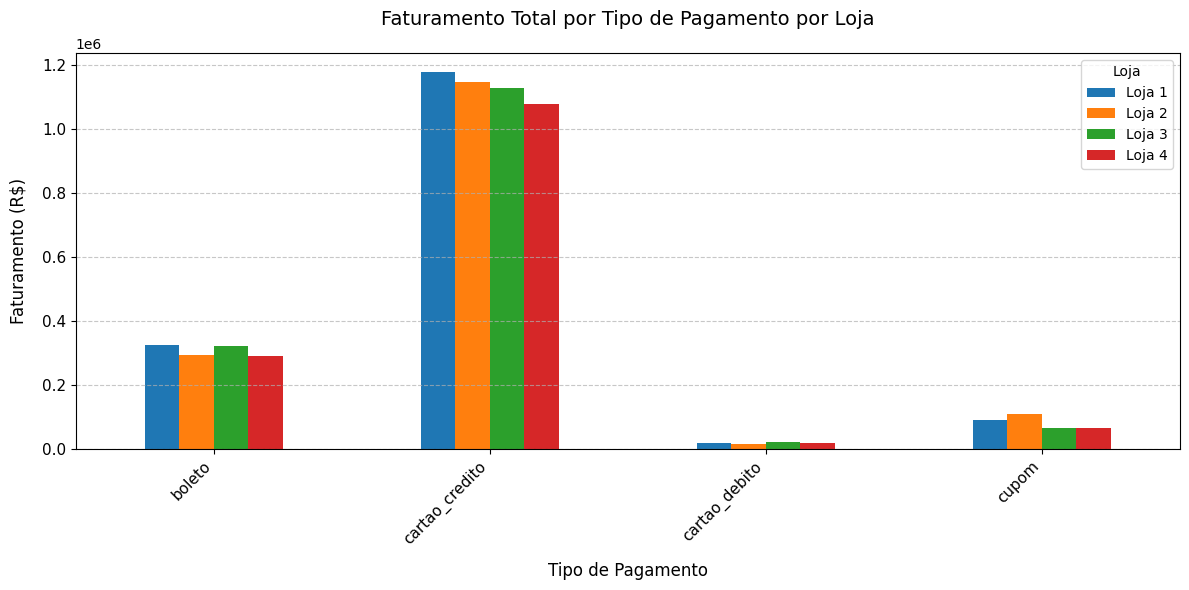

Gráfico de barras salvo como 'grafico_barras_faturamento_tipo_pagamento.png'


In [ ]:
# Importa as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# Agrupa por Loja e Tipo de pagamento, calcula o faturamento total
faturamento_tipo_loja = df.groupby(['Loja', 'Tipo de pagamento'])['Faturamento'].sum().reset_index()
pivot_tipo = faturamento_tipo_loja.pivot(index='Tipo de pagamento', columns='Loja', values='Faturamento')

# Define as cores personalizadas para as lojas
colors = {
    'Loja 1': '#1f77b4',  # Azul
    'Loja 2': '#ff7f0e',  # Laranja
    'Loja 3': '#2ca02c',  # Verde
    'Loja 4': '#d62728'   # Vermelho
}

# Gráfico: Barras (Faturamento por tipo de pagamento por loja)
plt.figure(figsize=(12, 6))
pivot_tipo.plot(
    kind='bar',
    ax=plt.gca(),
    color=[colors.get(col, 'gray') for col in pivot_tipo.columns]  # Aplica as cores definidas
)

plt.xlabel('Tipo de Pagamento', fontsize=12, labelpad=10)
plt.ylabel('Faturamento (R$)', fontsize=12, labelpad=10)
plt.title('Faturamento Total por Tipo de Pagamento por Loja', fontsize=14, pad=20)
plt.legend(title='Loja')
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('grafico_barras_faturamento_tipo_pagamento.png')
plt.show()

# Confirma salvamento do gráfico
print("Gráfico de barras salvo como 'grafico_barras_faturamento_tipo_pagamento.png'")

Para facilitar a comparacao do desempenho de cada loja em relacao aos tipos de pagamento, criei uma visualizacao grafica.

Compreender esses padroes de comportamento pode ajudar as lojas a ajustar suas estrategias de pagamento, oferecendo promocoes ou incentivos que atendam as preferencias dos clientes, alem de potencialmente aumentar a satisfacao e a fidelizacao.

# 2. Vendas por Categoria


Realizei uma extracao das vendas e do faturamento, organizando os dados para mostrar como estao distribuidos por categoria de produto em cada uma das quatro lojas. Para isso, agrupei as informacoes por loja e categoria, apresentando tres metricas principais: o numero de vendas, o faturamento total e a porcentagem que cada categoria representa em relacao ao total de vendas da loja.

Na tabela resultante, as categorias estao ordenadas do maior para o menor faturamento, o que facilita a identificacao das categorias mais lucrativas em cada loja. Essa organizacao permite uma analise clara e direta, ajudando a visualizar quais categorias de produtos estao se destacando e contribuindo mais para o faturamento.

In [ ]:
# Importa as bibliotecas
import pandas as pd
from tabulate import tabulate

# Função para formatar valores com R$
def format_currency(x):
    return f"R${x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")

# Função para formatar porcentagem
def format_percentage(x):
    return f"{x:.2f}%"

# Agrupa por Loja e Categoria do Produto, calculando vendas e faturamento
vendas_categoria = df.groupby(['Loja', 'Categoria do Produto']).agg({
    'Loja': 'count',                   # Número de vendas
    'Faturamento': 'sum'               # Faturamento total
}).rename(columns={'Loja': 'Vendas'}).reset_index()

# Adiciona totais por loja e calcula porcentagem, ordenando por Vendas
result_vendas = []
for loja in df['Loja'].unique():
    loja_data = vendas_categoria[vendas_categoria['Loja'] == loja].copy()
    total_vendas = loja_data['Vendas'].sum()
    total_faturamento = loja_data['Faturamento'].sum()
    loja_data['Porcentagem (%)'] = (loja_data['Vendas'] / total_vendas * 100)
    # Ordena por Vendas em ordem decrescente
    loja_data = loja_data.sort_values(by='Vendas', ascending=False)
    total_row = pd.DataFrame({
        'Loja': [loja],
        'Categoria do Produto': ['Total'],
        'Vendas': [total_vendas],
        'Faturamento': [total_faturamento],
        'Porcentagem (%)': [100.0]
    })
    result_vendas.append(pd.concat([loja_data, total_row], ignore_index=True))
vendas_categoria = pd.concat(result_vendas, ignore_index=True)

# Formata as colunas
vendas_categoria['Faturamento (R$)'] = vendas_categoria['Faturamento'].apply(format_currency)
vendas_categoria['Porcentagem (%)'] = vendas_categoria['Porcentagem (%)'].apply(format_percentage)

# Seleciona colunas para exibição
vendas_categoria = vendas_categoria[['Loja', 'Categoria do Produto', 'Vendas', 'Faturamento (R$)', 'Porcentagem (%)']]

# Exibe a tabela com espaços entre lojas
print("Vendas Total por Categoria de Produto por Loja (Ordenado por Vendas Totais):")
for loja in vendas_categoria['Loja'].unique():
    loja_data = vendas_categoria[vendas_categoria['Loja'] == loja]
    print(f"\n{loja}:")
    print(tabulate(loja_data, headers='keys', tablefmt='psql', showindex=False))

Vendas Total por Categoria de Produto por Loja (Ordenado por Vendas Totais):

Loja 1:
+--------+------------------------+----------+--------------------+-------------------+
| Loja   | Categoria do Produto   |   Vendas | Faturamento (R$)   | Porcentagem (%)   |
|--------+------------------------+----------+--------------------+-------------------|
| Loja 1 | moveis                 |      465 | R$263.505,32       | 19.71%            |
| Loja 1 | eletronicos            |      448 | R$603.278,24       | 18.99%            |
| Loja 1 | brinquedos             |      324 | R$25.299,27        | 13.73%            |
| Loja 1 | eletrodomesticos       |      312 | R$510.678,32       | 13.23%            |
| Loja 1 | esporte e lazer        |      284 | R$55.216,66        | 12.04%            |
| Loja 1 | instrumentos musicais  |      182 | R$128.243,50       | 7.72%             |
| Loja 1 | livros                 |      173 | R$12.336,41        | 7.33%             |
| Loja 1 | utilidades domesticas  

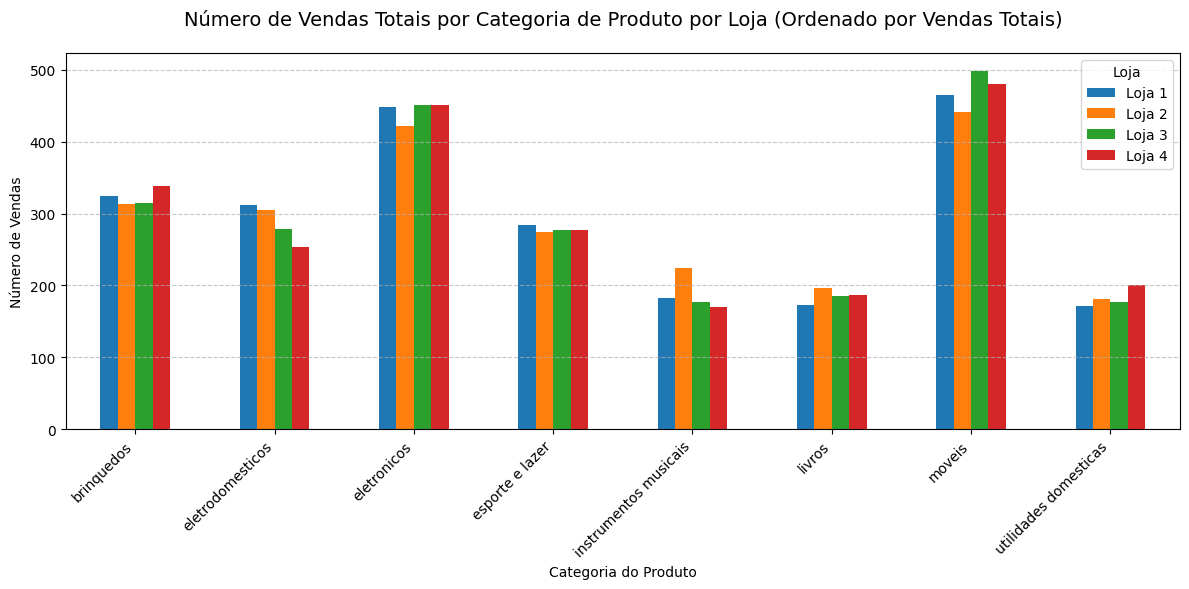

Gráfico de vendas salvo como 'grafico_barras_vendas_categoria.png'


In [ ]:
# Importa as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# Remove a linha de "Total" para os gráficos e cria uma cópia explícita
vendas_categoria_plot = vendas_categoria[vendas_categoria['Categoria do Produto'] != 'Total'].copy()

# Ordena as categorias pelo total de vendas (somando todas as lojas)
categoria_totals = vendas_categoria_plot.groupby('Categoria do Produto')['Vendas'].sum().sort_values(ascending=False)
vendas_categoria_plot = vendas_categoria_plot.set_index('Categoria do Produto').loc[categoria_totals.index].reset_index()

# Define as cores personalizadas para as lojas
colors = {
    'Loja 1': '#1f77b4',  # Azul
    'Loja 2': '#ff7f0e',  # Laranja
    'Loja 3': '#2ca02c',  # Verde
    'Loja 4': '#d62728'   # Vermelho
}

# Gráfico: Número de Vendas por Categoria de Produto por Loja
pivot_vendas = vendas_categoria_plot.pivot(index='Categoria do Produto', columns='Loja', values='Vendas')

plt.figure(figsize=(12, 6))
pivot_vendas.plot(
    kind='bar',
    ax=plt.gca(),
    color=[colors.get(col, 'gray') for col in pivot_vendas.columns]
)
plt.xlabel('Categoria do Produto')
plt.ylabel('Número de Vendas')
plt.title('Número de Vendas Totais por Categoria de Produto por Loja (Ordenado por Vendas Totais)', fontsize=14, pad=20)
plt.legend(title='Loja')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('grafico_barras_vendas_categoria.png')
plt.show()

# Confirma salvamento do gráfico
print("Gráfico de vendas salvo como 'grafico_barras_vendas_categoria.png'")

Apos a analise das vendas e do faturamento por categoria de produto, posso destacar as categorias que se mostraram mais populares em cada uma das quatro lojas. Entre as categorias analisadas, moveis e eletrodomesticos se destacam como as mais procuradas pelos clientes.

# 3. Média de Avaliação das Lojas

Realizei uma analise da avaliacao media das compras em cada uma das quatro lojas, organizando os dados em uma tabela. Os valores foram formatados para duas casas decimais, utilizando uma escala de 0 a 5, onde 0 representa uma experiencia muito insatisfatoria e 5 uma experiencia excelente.

In [ ]:
# Importa as bibliotecas
import pandas as pd
from tabulate import tabulate

# Função para formatar avaliação média
def format_rating(x):
    return f"{x:.2f}"

# Agrupa por Loja e calcula a avaliação média
avaliacao_lojas = df.groupby('Loja').agg({
    'Avaliação da compra': 'mean'      # Avaliação média
}).rename(columns={
    'Avaliação da compra': 'Avaliação Média'
}).reset_index()

# Formata a coluna de avaliação média
avaliacao_lojas['Avaliação Média'] = avaliacao_lojas['Avaliação Média'].apply(format_rating)

# Exibe a tabela
print("\nAvaliação Média da Compra por Loja (Escala de 0 a 5):")
print(tabulate(avaliacao_lojas, headers='keys', tablefmt='psql', showindex=False))


Avaliação Média da Compra por Loja (Escala de 0 a 5):
+--------+-------------------+
| Loja   |   Avaliação Média |
|--------+-------------------|
| Loja 1 |              3.98 |
| Loja 2 |              4.04 |
| Loja 3 |              4.05 |
| Loja 4 |              4    |
+--------+-------------------+


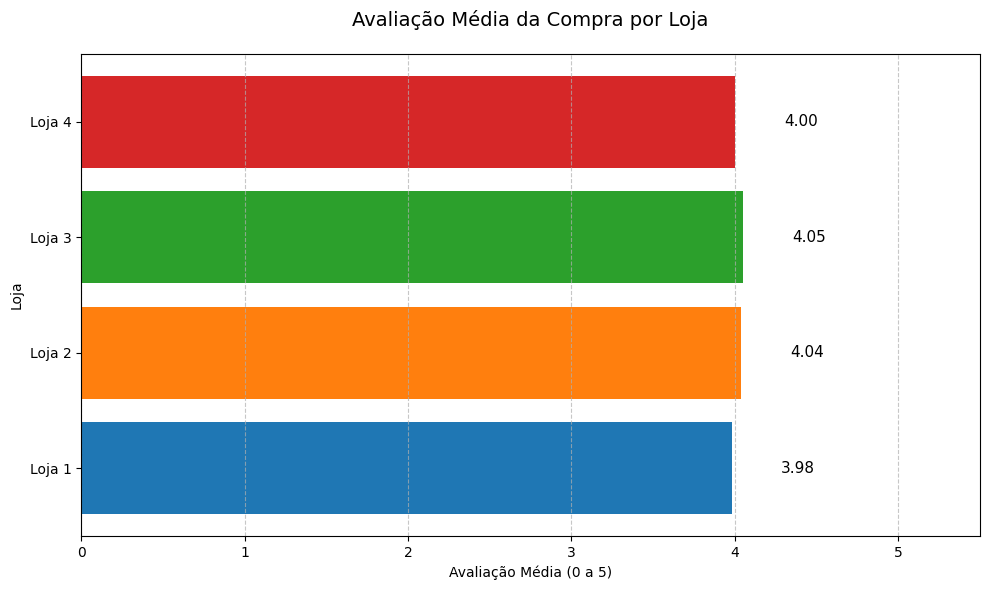

Gráfico salvo como 'grafico_barras_avaliacao_compra.png'


In [ ]:
# Importa as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

# Converte Avaliação Média de volta para numérico para o gráfico
avaliacao_lojas_plot = avaliacao_lojas.copy()
avaliacao_lojas_plot['Avaliação Média'] = avaliacao_lojas_plot['Avaliação Média'].astype(float)

# Define as cores personalizadas para as lojas
colors = {
    'Loja 1': '#1f77b4',  # Azul
    'Loja 2': '#ff7f0e',  # Laranja
    'Loja 3': '#2ca02c',  # Verde
    'Loja 4': '#d62728'   # Vermelho
}

# Gráfico: Avaliação Média da Compra por Loja (Barras Horizontais)
plt.figure(figsize=(10, 6))
plt.barh(
    y=avaliacao_lojas_plot['Loja'],
    width=avaliacao_lojas_plot['Avaliação Média'],
    color=[colors.get(loja, 'gray') for loja in avaliacao_lojas_plot['Loja']]  # Aplica as cores diretamente
)
plt.xlabel('Avaliação Média (0 a 5)')
plt.ylabel('Loja')
plt.title('Avaliação Média da Compra por Loja', fontsize=14, pad=20)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Define o limite do eixo X para a escala de 0 a 5, com espaço extra para os rótulos
plt.xlim(0, 5.5)

# Adiciona os valores no final de cada barra com deslocamento
for i, valor in enumerate(avaliacao_lojas_plot['Avaliação Média']):
    plt.text(valor + 0.3, i, f'{valor:.2f}', va='center', fontsize=11)

plt.tight_layout()
plt.savefig('grafico_barras_avaliacao_compra.png')
plt.show()

# Confirma salvamento do gráfico
print("Gráfico salvo como 'grafico_barras_avaliacao_compra.png'")

# 4. Produtos Mais e Menos Vendidos

Para compreender melhor os padroes de compra dos clientes nas quatro lojas, identifiquei quais produtos estavam se destacando nas vendas, tanto os mais vendidos quanto os menos vendidos. Para isso, agrupei os dados por loja e produto, calculando o numero de vendas e o faturamento de cada item.

In [ ]:
# Importa as bibliotecas
import pandas as pd
from tabulate import tabulate

# Função para formatar valores com R$
def format_currency(x):
    return f"R${x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")

# Função para formatar porcentagem
def format_percentage(x):
    return f"{x:.1f}%"

# Função para analisar produtos destaque em cada loja
def produto_destaque(loja_df, nome_loja):
    if loja_df.empty:
        return None
    # Conta a frequência e calcula o faturamento por produto
    contagem = loja_df.groupby('Produto').agg({
        'Produto': 'count',
        'Faturamento': 'sum'
    }).rename(columns={'Produto': 'Vendas'})

    # Identifica o produto mais vendido (maior contagem)
    mais_vendido = contagem['Vendas'].idxmax()
    vendas_mais = contagem['Vendas'].max()
    faturamento_mais = contagem.loc[mais_vendido, 'Faturamento']

    # Identifica o produto menos vendido (menor contagem)
    menos_vendido = contagem['Vendas'].idxmin()
    vendas_menos = contagem['Vendas'].min()
    faturamento_menos = contagem.loc[menos_vendido, 'Faturamento']

    # Cria DataFrame com os resultados (sem porcentagem por enquanto)
    return pd.DataFrame({
        'Loja': [nome_loja, nome_loja],
        'Destaque': ['Mais Vendido', 'Menos Vendido'],
        'Produto': [mais_vendido, menos_vendido],
        'Vendas': [vendas_mais, vendas_menos],
        'Faturamento': [faturamento_mais, faturamento_menos]
    })

# Aplica a função para cada loja e concatena os resultados
resultados = []
for nome in ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']:
    loja_df = df[df['Loja'] == nome]
    resultado = produto_destaque(loja_df, nome)
    if resultado is not None:
        resultados.append(resultado)

# Concatena todos os resultados
produtos_destaque = pd.concat(resultados, ignore_index=True)

# Calcula os totais de vendas para mais vendidos e menos vendidos
total_mais_vendidos = produtos_destaque[produtos_destaque['Destaque'] == 'Mais Vendido']['Vendas'].sum()
total_menos_vendidos = produtos_destaque[produtos_destaque['Destaque'] == 'Menos Vendido']['Vendas'].sum()

# Adiciona a coluna de porcentagem com base nos totais
produtos_destaque['Porcentagem (%)'] = produtos_destaque.apply(
    lambda row: (row['Vendas'] / total_mais_vendidos * 100) if row['Destaque'] == 'Mais Vendido'
    else (row['Vendas'] / total_menos_vendidos * 100),
    axis=1
)

# Formata as colunas
produtos_destaque['Faturamento (R$)'] = produtos_destaque['Faturamento'].apply(format_currency)
produtos_destaque['Porcentagem (%)'] = produtos_destaque['Porcentagem (%)'].apply(format_percentage)

# Seleciona colunas para exibição
produtos_destaque_display = produtos_destaque[['Loja', 'Destaque', 'Produto', 'Vendas', 'Faturamento (R$)', 'Porcentagem (%)']]

# Exibe a tabela com espaços entre lojas
print("Produtos Mais e Menos Vendidos por Loja:")
for loja in produtos_destaque_display['Loja'].unique():
    loja_data = produtos_destaque_display[produtos_destaque_display['Loja'] == loja]
    print(f"\n{loja}:")
    print(tabulate(loja_data, headers='keys', tablefmt='psql', showindex=False))

Produtos Mais e Menos Vendidos por Loja:

Loja 1:
+--------+---------------+---------------+----------+--------------------+-------------------+
| Loja   | Destaque      | Produto       |   Vendas | Faturamento (R$)   | Porcentagem (%)   |
|--------+---------------+---------------+----------+--------------------+-------------------|
| Loja 1 | Mais Vendido  | Guarda roupas |       60 | R$41.368,17        | 24.6%             |
| Loja 1 | Menos Vendido | Celular ABXY  |       33 | R$45.864,61        | 24.8%             |
+--------+---------------+---------------+----------+--------------------+-------------------+

Loja 2:
+--------+---------------+--------------------------+----------+--------------------+-------------------+
| Loja   | Destaque      | Produto                  |   Vendas | Faturamento (R$)   | Porcentagem (%)   |
|--------+---------------+--------------------------+----------+--------------------+-------------------|
| Loja 2 | Mais Vendido  | Iniciando em programação |

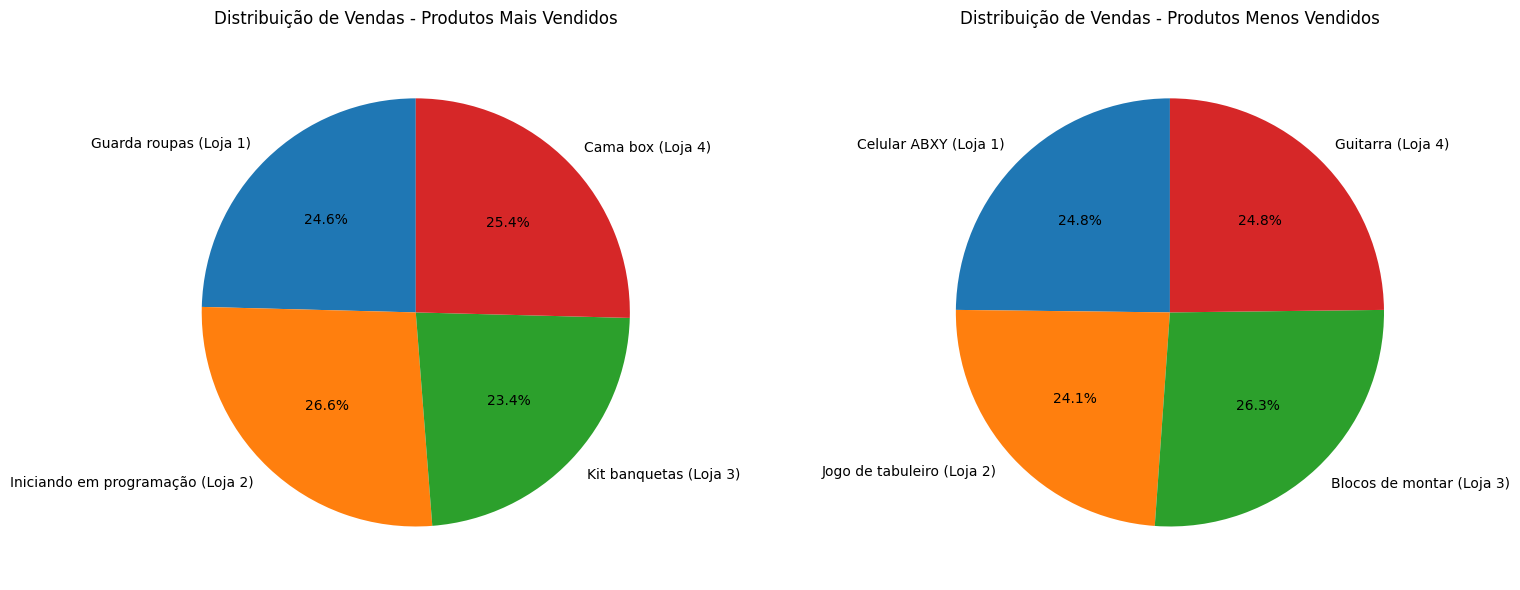

Gráfico salvo como 'grafico_pizza_produtos_destaque.png'


In [ ]:
# Importa as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# Define as cores personalizadas para as lojas
colors = {
    'Loja 1': '#1f77b4',  # Azul
    'Loja 2': '#ff7f0e',  # Laranja
    'Loja 3': '#2ca02c',  # Verde
    'Loja 4': '#d62728'   # Vermelho
}

# Separa os dados para os produtos mais vendidos e menos vendidos
mais_vendidos = produtos_destaque[produtos_destaque['Destaque'] == 'Mais Vendido']
menos_vendidos = produtos_destaque[produtos_destaque['Destaque'] == 'Menos Vendido']

# Cria uma figura com dois subplots lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de Pizza 1: Produtos Mais Vendidos
labels_mais = [f"{row['Produto']} ({row['Loja']})" for _, row in mais_vendidos.iterrows()]
ax1.pie(
    mais_vendidos['Vendas'],
    labels=labels_mais,
    colors=[colors.get(loja, 'gray') for loja in mais_vendidos['Loja']],
    autopct='%1.1f%%',
    startangle=90
)
ax1.set_title('Distribuição de Vendas - Produtos Mais Vendidos', fontsize=12, pad=15)

# Gráfico de Pizza 2: Produtos Menos Vendidos
labels_menos = [f"{row['Produto']} ({row['Loja']})" for _, row in menos_vendidos.iterrows()]
ax2.pie(
    menos_vendidos['Vendas'],
    labels=labels_menos,
    colors=[colors.get(loja, 'gray') for loja in menos_vendidos['Loja']],
    autopct='%1.1f%%',
    startangle=90
)
ax2.set_title('Distribuição de Vendas - Produtos Menos Vendidos', fontsize=12, pad=15)

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.savefig('grafico_pizza_produtos_destaque.png')
plt.show()

# Confirma salvamento do gráfico
print("Gráfico salvo como 'grafico_pizza_produtos_destaque.png'")

Para entender melhor os padroes de consumo dos clientes, realizei uma analise do desempenho dos produtos em diferentes locais. O objetivo foi identificar quais produtos estao se destacando nas vendas em cada estado, tanto os mais vendidos quanto os menos vendidos.

Agrupei os dados por estado e produto, calculando o numero de vendas e o faturamento de cada item em cada local. Essa abordagem permite uma visao mais granular do comportamento dos consumidores em diferentes regioes.

In [ ]:
# Importa as bibliotecas
import pandas as pd
from tabulate import tabulate

# Função para formatar valores com R$
def format_currency(x):
    return f"R${x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")

# Função para formatar porcentagem
def format_percentage(x):
    return f"{x:.1f}%"

# Função para analisar produtos destaque em cada local de compra
def produto_destaque_local(local_df, nome_local):
    if local_df.empty:
        return None
    # Conta a frequência e calcula o faturamento por produto
    contagem = local_df.groupby('Produto').agg({
        'Produto': 'count',
        'Faturamento': 'sum'
    }).rename(columns={'Produto': 'Vendas'})

    # Identifica o produto mais vendido (maior contagem)
    mais_vendido = contagem['Vendas'].idxmax()
    vendas_mais = contagem['Vendas'].max()
    faturamento_mais = contagem.loc[mais_vendido, 'Faturamento']

    # Identifica o produto menos vendido (menor contagem)
    menos_vendido = contagem['Vendas'].idxmin()
    vendas_menos = contagem['Vendas'].min()
    faturamento_menos = contagem.loc[menos_vendido, 'Faturamento']

    # Cria DataFrame com os resultados (sem porcentagem por enquanto)
    return pd.DataFrame({
        'Local da compra': [nome_local, nome_local],
        'Destaque': ['Mais Vendido', 'Menos Vendido'],
        'Produto': [mais_vendido, menos_vendido],
        'Vendas': [vendas_mais, vendas_menos],
        'Faturamento': [faturamento_mais, faturamento_menos]
    })

# Obtém todos os locais de compra únicos
locais = df['Local da compra'].unique()

# Aplica a função para cada local de compra e concatena os resultados
resultados = []
for local in locais:
    local_df = df[df['Local da compra'] == local]
    resultado = produto_destaque_local(local_df, local)
    if resultado is not None:
        resultados.append(resultado)

# Concatena todos os resultados
produtos_destaque_local = pd.concat(resultados, ignore_index=True)

# Calcula os totais de vendas para mais vendidos e menos vendidos
total_mais_vendidos = produtos_destaque_local[produtos_destaque_local['Destaque'] == 'Mais Vendido']['Vendas'].sum()
total_menos_vendidos = produtos_destaque_local[produtos_destaque_local['Destaque'] == 'Menos Vendido']['Vendas'].sum()

# Adiciona a coluna de porcentagem com base nos totais
produtos_destaque_local['Porcentagem (%)'] = produtos_destaque_local.apply(
    lambda row: (row['Vendas'] / total_mais_vendidos * 100) if row['Destaque'] == 'Mais Vendido'
    else (row['Vendas'] / total_menos_vendidos * 100),
    axis=1
)

# Formata as colunas
produtos_destaque_local['Faturamento (R$)'] = produtos_destaque_local['Faturamento'].apply(format_currency)
produtos_destaque_local['Porcentagem (%)'] = produtos_destaque_local['Porcentagem (%)'].apply(format_percentage)

# Ordena os locais com base no número de vendas dos produtos mais vendidos (descendente)
mais_vendidos = produtos_destaque_local[produtos_destaque_local['Destaque'] == 'Mais Vendido']
ordem_locais = mais_vendidos.sort_values(by='Vendas', ascending=False)['Local da compra'].tolist()
produtos_destaque_local = produtos_destaque_local.set_index('Local da compra').loc[ordem_locais].reset_index()

# Seleciona colunas para exibição
produtos_destaque_local_display = produtos_destaque_local[['Local da compra', 'Destaque', 'Produto', 'Vendas', 'Faturamento (R$)', 'Porcentagem (%)']]

# Exibe a tabela com espaços entre locais, na ordem definida
print("Produtos Totais Mais e Menos Vendidos por Local da Compra (Ordenado do Maior para o Menor):")
for local in ordem_locais:
    local_data = produtos_destaque_local_display[produtos_destaque_local_display['Local da compra'] == local]
    print(f"\n{local}:")
    print(tabulate(local_data, headers='keys', tablefmt='psql', showindex=False))

Produtos Totais Mais e Menos Vendidos por Local da Compra (Ordenado do Maior para o Menor):

SP:
+-------------------+---------------+--------------------------+----------+--------------------+-------------------+
| Local da compra   | Destaque      | Produto                  |   Vendas | Faturamento (R$)   | Porcentagem (%)   |
|-------------------+---------------+--------------------------+----------+--------------------+-------------------|
| SP                | Mais Vendido  | Carrinho controle remoto |      104 | R$10.387,06        | 32.3%             |
| SP                | Menos Vendido | Headset                  |       57 | R$11.150,45        | 53.8%             |
+-------------------+---------------+--------------------------+----------+--------------------+-------------------+

RJ:
+-------------------+---------------+------------------+----------+--------------------+-------------------+
| Local da compra   | Destaque      | Produto          |   Vendas | Faturamento (R$)   

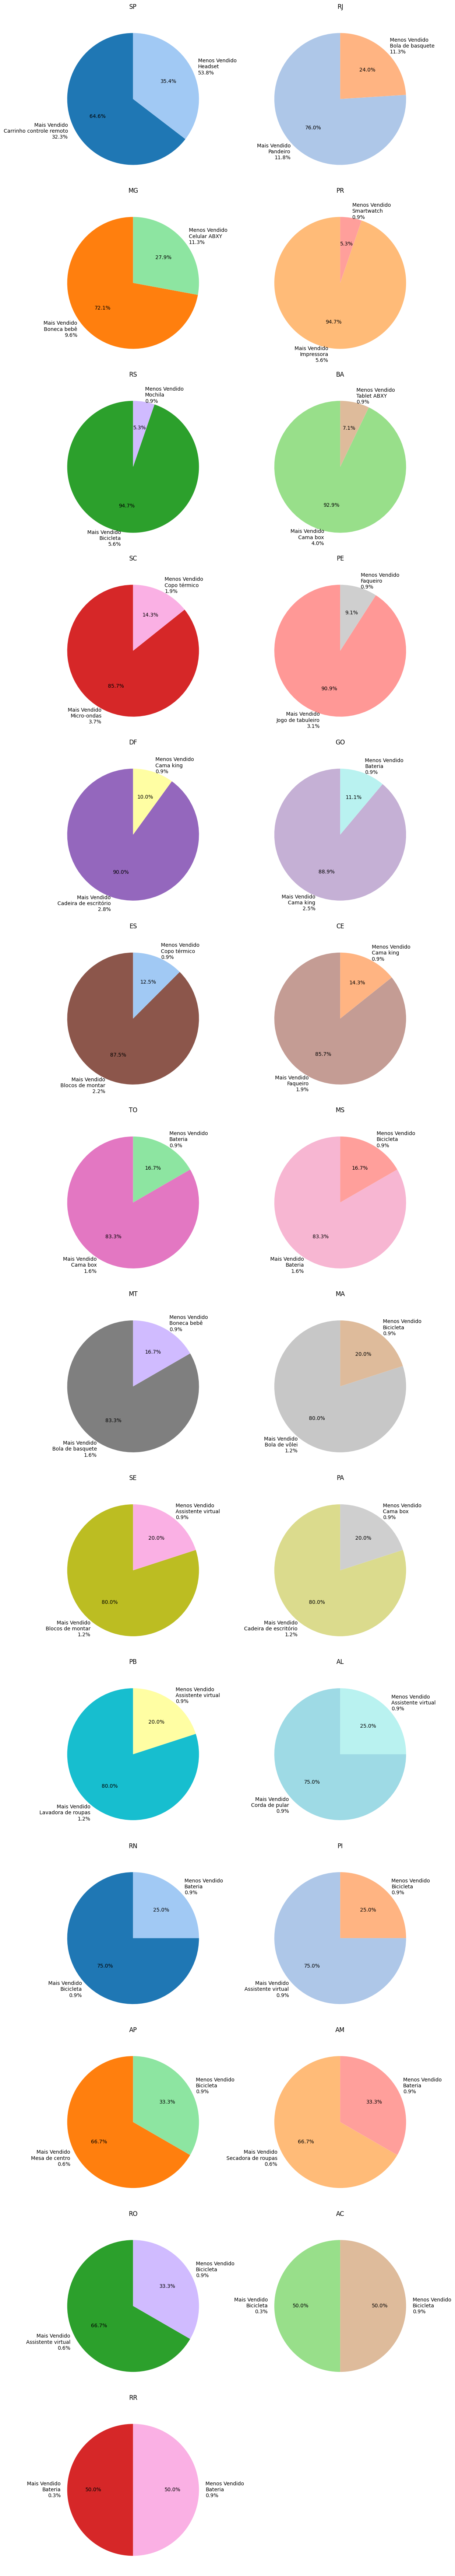

Gráfico salvo como 'grafico_pizza_produtos_destaque_local_compra_cores_diferentes.png'


In [ ]:
# Importa as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Cria duas paletas de cores: uma para "Mais Vendido" e outra para "Menos Vendido"
locais = produtos_destaque_local['Local da compra'].unique()
palette_mais = sns.color_palette("tab20", len(locais))  # Cores escuras para "Mais Vendido"
palette_menos = sns.color_palette("pastel", len(locais))  # Cores claras para "Menos Vendido"
colors_mais = dict(zip(locais, palette_mais))
colors_menos = dict(zip(locais, palette_menos))

# Define o número de colunas e calcula o número de linhas necessário
n_cols = 2  # Número de colunas na grade de subplots
n_rows = math.ceil(len(locais) / n_cols)  # Calcula o número de linhas necessário

# Cria uma figura com subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))
axes = axes.flatten()  # Transforma a matriz de eixos em uma lista para facilitar o acesso

# Cria um gráfico de pizza para cada local
for idx, local in enumerate(locais):
    # Filtra os dados do local atual
    local_data = produtos_destaque_local[produtos_destaque_local['Local da compra'] == local]

    # Dados para o gráfico de pizza
    vendas = local_data['Vendas'].values
    labels = [f"{row['Destaque']}\n{row['Produto']}\n{row['Porcentagem (%)']}" for _, row in local_data.iterrows()]

    # Define as cores para as fatias (diferentes para Mais e Menos Vendido)
    cores = [colors_mais[local] if 'Mais Vendido' in label else colors_menos[local] for label in labels]

    # Plota o gráfico de pizza
    axes[idx].pie(
        vendas,
        labels=labels,
        colors=cores,
        autopct='%1.1f%%',
        startangle=90
    )
    axes[idx].set_title(local, fontsize=12, pad=15)

# Remove subplots vazios, se houver
for idx in range(len(locais), len(axes)):
    fig.delaxes(axes[idx])

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.savefig('grafico_pizza_produtos_destaque_local_compra_cores_diferentes.png')
plt.show()

# Confirma salvamento do gráfico
print("Gráfico salvo como 'grafico_pizza_produtos_destaque_local_compra_cores_diferentes.png'")

# 5. Frete Médio por Loja


Eu precisava analisar como os custos de frete afetavam as vendas das quatro lojas, entao examinei os dados detalhadamente por estado. Agrupei as informacoes por loja e estado, calculei o frete medio, minimo, maximo e o total de vendas, e organizei tudo em uma tabela, ordenada do maior para o menor frete medio, com valores formatados em reais.

In [ ]:
# Importa as bibliotecas necessárias
import pandas as pd
from tabulate import tabulate

# Função para formatar valores com R$
def format_currency(x):
    return f"R${x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")

# Agrupa por Loja e Local da compra (estado) e calcula frete médio, mínimo, máximo e total de vendas
frete_estado = df.groupby(['Loja', 'Local da compra']).agg({
    'Frete': ['mean', 'min', 'max'],
    'Local da compra': 'count'  # Conta o número de vendas
}).reset_index()

# Nomeia as colunas
frete_estado.columns = ['Loja', 'Local da compra', 'Frete Médio', 'Frete Mínimo', 'Frete Máximo', 'Total de Vendas']

# Ordena os dados frete médio
frete_estado = frete_estado.sort_values(by=['Loja', 'Frete Médio', 'Frete Máximo', 'Frete Mínimo', 'Total de Vendas'],
                                        ascending=[True, False, False, False, False])

# Formata os valores em reais
frete_estado['Frete Médio (R$)'] = frete_estado['Frete Médio'].apply(format_currency)
frete_estado['Frete Mínimo (R$)'] = frete_estado['Frete Mínimo'].apply(format_currency)
frete_estado['Frete Máximo (R$)'] = frete_estado['Frete Máximo'].apply(format_currency)

# Seleciona as colunas para exibição
frete_estado_display = frete_estado[['Loja', 'Local da compra', 'Frete Médio (R$)', 'Frete Mínimo (R$)', 'Frete Máximo (R$)', 'Total de Vendas']]

# Exibe a tabela separada por loja e mostra o frete médio geral fora da tabela
print("Frete Médio por Loja e Estado (Dados Ordenados de Maior para o Menor na Coluna Frete Médio ):")
for loja in frete_estado_display['Loja'].unique():
    loja_data = frete_estado_display[frete_estado_display['Loja'] == loja]
    print(f"\n{loja}:")
    print(tabulate(loja_data[['Local da compra', 'Frete Médio (R$)', 'Frete Mínimo (R$)', 'Frete Máximo (R$)', 'Total de Vendas']],
                   headers='keys', tablefmt='psql', showindex=False))

    # Calcula e exibe o frete médio geral da loja
    loja_data_calc = frete_estado[frete_estado['Loja'] == loja]
    frete_medio_geral = (loja_data_calc['Frete Médio'] * loja_data_calc['Total de Vendas']).sum() / loja_data_calc['Total de Vendas'].sum()
    frete_medio_geral_formatted = format_currency(frete_medio_geral)
    print(f"Frete Médio {loja}: {frete_medio_geral_formatted}")

# Calcula o frete médio por loja para uso na célula gráfica (mantido para consistência)
frete_loja = df.groupby('Loja').agg({
    'Frete': ['mean']
}).reset_index()

frete_loja.columns = ['Loja', 'Frete Médio']
globals()['frete_loja'] = frete_loja

Frete Médio por Loja e Estado (Dados Ordenados de Maior para o Menor na Coluna Frete Médio ):

Loja 1:
+-------------------+--------------------+---------------------+---------------------+-------------------+
| Local da compra   | Frete Médio (R$)   | Frete Mínimo (R$)   | Frete Máximo (R$)   |   Total de Vendas |
|-------------------+--------------------+---------------------+---------------------+-------------------|
| AC                | R$123,84           | R$123,84            | R$123,84            |                 1 |
| RO                | R$57,89            | R$1,16              | R$180,13            |                 5 |
| GO                | R$53,51            | R$0,00              | R$201,26            |                51 |
| PB                | R$48,15            | R$0,00              | R$200,83            |                14 |
| TO                | R$46,28            | R$0,00              | R$161,68            |                11 |
| RN                | R$44,66            

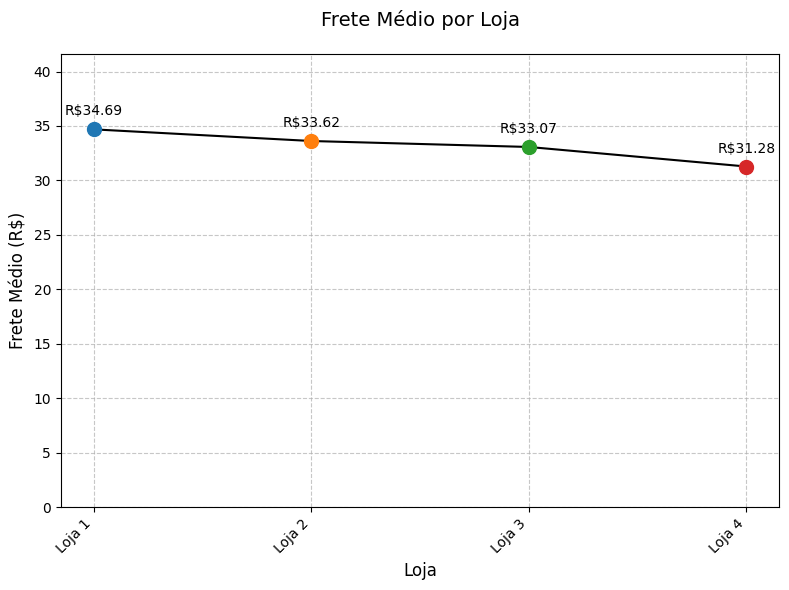

In [ ]:
# Importa as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# Define as cores personalizadas para as lojas
cores_lojas = {
    'Loja 1': '#1f77b4',  # Azul
    'Loja 2': '#ff7f0e',  # Laranja
    'Loja 3': '#2ca02c',  # Verde
    'Loja 4': '#d62728'   # Vermelho
}

# Gráfico de Linhas: Frete Médio por Loja
plt.figure(figsize=(8, 6))

# Plota a linha preta conectando todos os pontos
plt.plot(range(len(frete_loja)), frete_loja['Frete Médio'], color='black', linewidth=1.5)

# Plota os pontos (bolinhas) com as cores específicas de cada loja
for i, loja in enumerate(frete_loja['Loja']):
    plt.scatter(i, frete_loja.iloc[i]['Frete Médio'], color=cores_lojas[loja], s=100, zorder=5)

# Adiciona rótulos com o valor do frete médio
for i, v in enumerate(frete_loja['Frete Médio']):
    plt.text(i, v + 1, f"R${v:.2f}", ha='center', va='bottom', fontsize=10)

plt.xlabel('Loja', fontsize=12)
plt.ylabel('Frete Médio (R$)', fontsize=12)
plt.title('Frete Médio por Loja', fontsize=14, pad=20)
plt.ylim(0, max(frete_loja['Frete Médio']) * 1.2)
plt.xticks(range(len(frete_loja)), frete_loja['Loja'], rotation=45, ha='right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Conclusão

# Relatório de Análise da Alura Store

## Introdução
Eu sou o **Arley Ribeiro Analista de Dados** responsável por avaliar qual das quatro lojas do Sr. João deve ser vendida. Analisei cinco metricas principais: **Faturamento total**, **Categorias de produtos**, **Media de avaliacoes dos clientes**, **Produtos mais e menos vendidos** e **Custo medio de frete**. Este relatorio apresenta um período de três anos (2020-2023) para embasar minhas conclusoes e uma recomendacao.

## Análise Sazonal (Loja 4)
A análise dos padrões sazonais revelou que a Loja 4 apresenta seu melhor desempenho nos meses de novembro e dezembro, coincidindo com a Black Friday e o Natal. Durante esses períodos, faturamento médio em R$218.738,02 mensais, impulsionado principalmente pelas categorias de eletrônicos (19,13% do faturamento) e móveis (20,36%).

Nos demais meses, o faturamento cai para cerca de R$10.207,77, com excecao de pequenos picos em julho. A sazonalidade sugere que o valor da loja seria mais atraente para potenciais compradores quando apresentada com os resultados desses períodos de alta demanda.

## Recomendação Final
Vender a **Loja 4** após **novembro** e **dezembro**, quando o faturamento mensal pode chegar a R$218.738,02, torna o negocio mais atraente para compradores, destacando sua capacidade de gerar receita em periodos de alta demanda. Este momento oferece duas vantagens estrategicas:

1. **Dados recentes de desempenho**: Os resultados de novembro/dezembro demonstrarao a capacidade de geracao de receita.
2. **Visibilidade das categorias principais**: O desempenho em moveis e eletronicos estara em destaque.

Conclui que a **Loja 4** e a melhor candidata para venda devido ao seu menor faturamento, *apesar de sua eficiencia em custos de frete e satisfacao moderada dos clientes*. Ao vende-la em **janeiro**, apos os picos sazonais de **novembro** e **dezembro**.  